In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.draw import polygon
from skimage import img_as_ubyte  # Import for converting the image


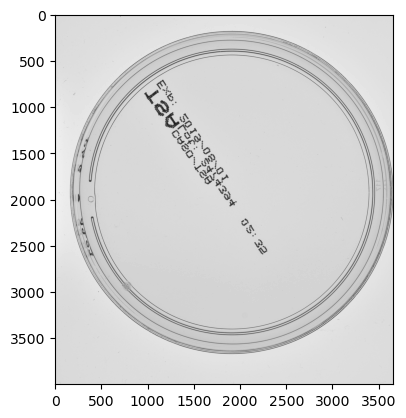

In [13]:
# Example image
im = plt.imread("../train_data/1004.jpg")
im = rgb2gray(im)
plt.imshow(im, cmap='gray')


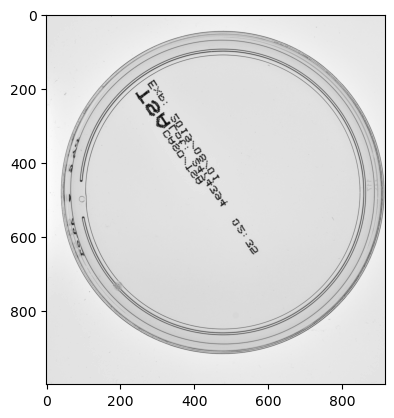

In [3]:
im2 = rescale(im, 0.25, anti_aliasing=True)
plt.imshow(im2, cmap='gray')
im.shape
s = np.linspace(0, 2*np.pi, 400)   #Number of points on the circle
r = im2.shape[0]/2 + im2.shape[0]/2*np.sin(s)            #Row
c = im2.shape[1]/2 + im2.shape[1]/2*np.cos(s)            #Column
init = np.array([r, c]).T


In [4]:
s = np.linspace(0, 2*np.pi, 400)   #Number of points on the circle
r = im2.shape[0]/2 + im2.shape[0]/2*np.sin(s)            #Row
c = im2.shape[1]/2 + im2.shape[1]/2*np.cos(s)            #Column
init = np.array([r, c]).T

(1000, 915)

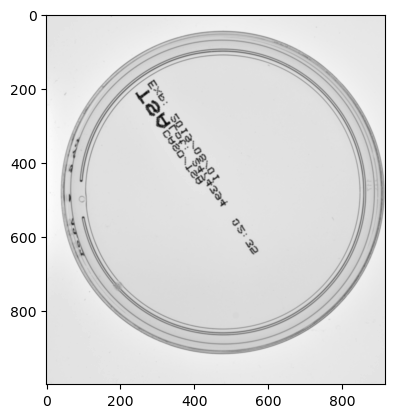

In [5]:
im2 = gaussian(im2, 1, preserve_range=False)

plt.imshow(im2, cmap='gray')
im2.shape

(0.0, 915.0, 1000.0, 0.0)

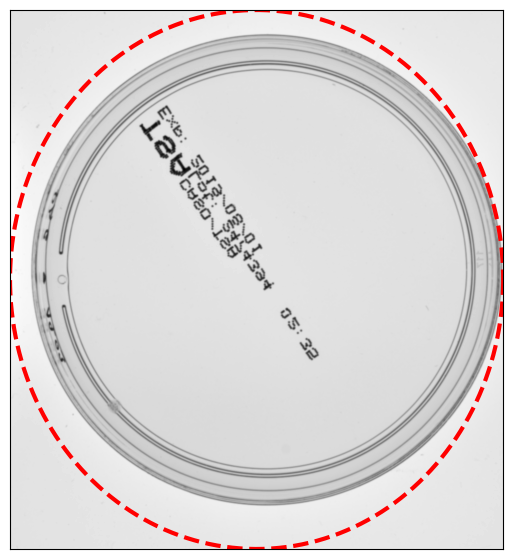

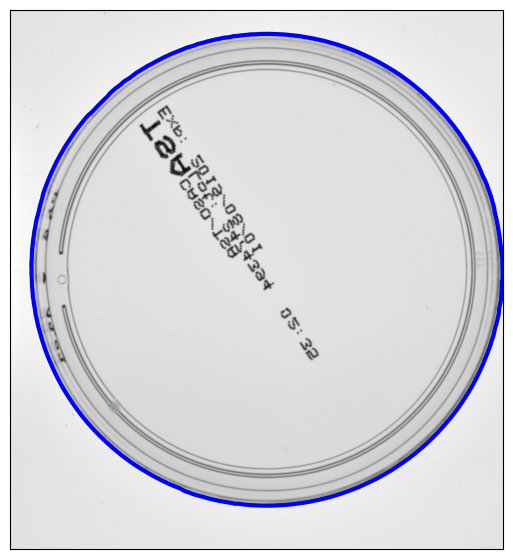

In [6]:
# Show
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im2, cmap=plt.cm.gray)

ax.plot(init[:, 1], init[:, 0], '--r', lw=3)      #the y coordinate is the ROW, so it is the first one to index

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im2.shape[1], im2.shape[0], 0])


# Run active contour segmentation, that will fit the circle onto the image
snake = active_contour(im2, init)

# Show
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im2, cmap=plt.cm.gray)

ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)    #the y coordinate is the ROW, so it is the first one to index

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im2.shape[1], im2.shape[0], 0])




(0.0, 915.0, 1000.0, 0.0)

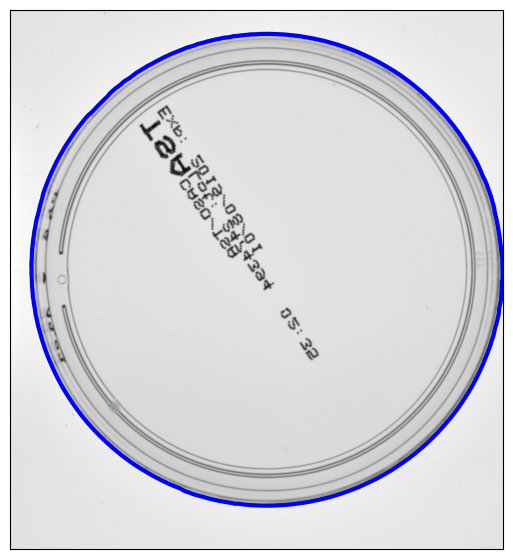

In [7]:

# Run active contour segmentation, that will fit the circle onto the image
snake = active_contour(im2, init)

# Show
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im2, cmap=plt.cm.gray)

ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)    #the y coordinate is the ROW, so it is the first one to index

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im2.shape[1], im2.shape[0], 0])


In [22]:


def process_image_with_snake_and_mask(image_name):
    # Construct input and output paths
    input_path = f'../train_data/{image_name}'
    output_path = f'../train_data_output/{image_name}'
    
    # Read the image
    im = imread(input_path, as_gray=True)
    
    # Resize the image to 256x256
    im_resized = resize(im, (256, 256), anti_aliasing=True)
    
    # Generate initial snake coordinates
    s = np.linspace(0, 2*np.pi, 400)
    r = im_resized.shape[0]/2 + im_resized.shape[0]/2 * np.sin(s)
    c = im_resized.shape[1]/2 + im_resized.shape[1]/2 * np.cos(s)
    init = np.array([r, c]).T
    
    # Apply Gaussian filter
    im_smoothed = gaussian(im_resized, 1, preserve_range=False)
    
    # Run active contour segmentation
    snake = active_contour(im_smoothed, init)
    
    # Create a mask for the area inside the snake
    rr, cc = polygon(snake[:, 0], snake[:, 1], im_smoothed.shape)
    mask = np.zeros(im_smoothed.shape, dtype=np.uint8)
    mask[rr, cc] = 1
    
    # Use the mask to set the grayscale value to 0 for everything outside the snake
    im_final = im_smoothed * mask
    
    # Convert the image to 8-bit unsigned integers
    im_final_uint8 = img_as_ubyte(im_final)
    
    # Save the final image
    imsave(output_path, im_final_uint8)

process_image_with_snake_and_mask('1004.jpg')


In [ ]:
import os

def process_all_images_in_directory():
    input_directory = '../train_data/'
    image_files = [f for f in os.listdir(input_directory) if f.endswith('.jpg')]

    for image_name in image_files:
        print(f'Processing {image_name}...')
        process_image_with_snake_and_mask(image_name)
        print(f'Finished processing {image_name}.')

# Make sure the process_image_with_snake_and_mask function is defined in your script before calling this function.
process_all_images_in_directory()


Processing 3661.jpg...
Finished processing 3661.jpg.
Processing 3992.jpg...
Finished processing 3992.jpg.
Processing 309.jpg...
Finished processing 309.jpg.
Processing 4717.jpg...
Finished processing 4717.jpg.
Processing 179.jpg...
Finished processing 179.jpg.
Processing 4515.jpg...
Finished processing 4515.jpg.
Processing 6678.jpg...
Finished processing 6678.jpg.
Processing 12419.jpg...
Finished processing 12419.jpg.
Processing 4677.jpg...
Finished processing 4677.jpg.
Processing 13107.jpg...
Finished processing 13107.jpg.
Processing 4847.jpg...
Finished processing 4847.jpg.
Processing 6442.jpg...
Finished processing 6442.jpg.
Processing 12550.jpg...
Finished processing 12550.jpg.
Processing 2770.jpg...
Finished processing 2770.jpg.
Processing 16765.jpg...
Finished processing 16765.jpg.
Processing 905.jpg...
Finished processing 905.jpg.
Processing 16507.jpg...
Finished processing 16507.jpg.
Processing 6551.jpg...
Finished processing 6551.jpg.
Processing 8248.jpg...
Finished processing